In [52]:
import numpy as np
import time
from scipy import linalg
import matplotlib.pyplot as plt
import pandas as pd
import pickle


# N次の行列式を解く関数
### numpyのライブラリにあった

In [69]:
#行列式の関数
#教科書p49


matrix = [[2,3,0],
          [0,2,1],
         [5,-4,-4]
                   ]


print(linalg.det(np.array(matrix)))#行列式計算

#https://sorai-note.com/math/determinant-calc/の例題
matrix = [
    [3, 4, 6, 2],
    [2, 4, 9, 3],
    [4, 1, -3, -1],
    [3, 1, 3, 1]
]
print(linalg.det(np.array(matrix)))#行列式計算

7.0
0.0


In [82]:

#解のない連立方程式に対応した関数
def solve_linear_equation(left_side, right_side):
    try:
        solution = np.linalg.solve(np.array(left_side), np.array(right_side))
    except np.linalg.LinAlgError:
        solution = [float('nan')] * len(right_side)
    return solution


#教科書p26
left_side = [
    [0,2,-2],
    [1,-2,3],
    [3,-8,6]
    ]
right_side = [-4,2,0]

print(solve_linear_equation(left_side, right_side))


#教科書p33
#解をもたない計算
left_side = [
    [3,2,-1],
    [4,-5,3],
    [1,16,-9]
    ]
right_side = [3,5,1]
print(solve_linear_equation(left_side, right_side))



[-4.  0.  2.]
[nan, nan, nan]


In [66]:
# ランダムなN次正方行列を生成
matrix = np.array([[1,0,-1],
                   [1,2,1],
                   [2,2,3]
                   ])
# 行列Aの固有値と固有ベクトルを計算
w, v = np.linalg.eig(matrix)
print(w)
print(v)

[2. 3. 1.]
[[-6.66666667e-01 -4.08248290e-01  7.07106781e-01]
 [ 3.33333333e-01  4.08248290e-01 -7.07106781e-01]
 [ 6.66666667e-01  8.16496581e-01  1.75541673e-16]]


In [ ]:

# 各ベクトルの要素に適当な倍数を掛けて整数にする
scaled_eigenvectors = v* 1000000  # 適当な倍数を選ぶ

# 整数に変換されたベクトルを表示
print(scaled_eigenvectors.astype(int))

# 簡約化
for vector in scaled_eigenvectors:
    gcd_val = np.gcd.reduce(vector)
    vector //= gcd_val

# 簡約化されたベクトルを表示
print(scaled_eigenvectors)

### N次の行列を生成
計算回数分のリストを用意


In [56]:
#計算回数
TIMES = 30
TIMES_matrix_list = []
TIMES_right_list = []
TIMES_left_list = []
for i in range(30):
        
    #1次から1000次の正方行列を生成してリスト化
    matrix_list = []
    right_side_list = []
    for size in range(100,1001):
        matrix = np.random.randint(-10,10 , size = (size, size))
        matrix_list.append(matrix)
        right_side = np.random.randint(-10, 10, size = size)
        right_side_list.append(right_side)

    #1次から1000次の連立方程式を生成してリスト
    left_side_list = matrix_list
    TIMES_matrix_list.append(matrix_list)
    TIMES_left_list.append(left_side_list)
    TIMES_right_list.append(right_side_list)


### リストをforで回して計算して計算時間をリスト化

In [57]:

#複数回計算を回してその分散を見る
#計算時間はデスクトップだとTIMESが10のとき28s
#計算時間はデスクトップだと100から1000でTIMESが30のとき11mi
#ノートではやめとけ
determinant_time_df = pd.DataFrame()
for matrix_list in TIMES_matrix_list:
    #リストをforループで回し行列式の計算
    determinant_time_list = []#計算時間のリスト
    determinant_list = []
    for i, matrix in enumerate(matrix_list):
        start_time = time.time() 
        determinant = linalg.det(matrix)#行列式計算
        determinant_list.append(determinant)
        end_time = time.time()
        diff_time = end_time - start_time
        determinant_time_list.append(diff_time)
    determinant_time_df = pd.concat([determinant_time_df,pd.Series(determinant_time_list)], axis=1)

In [73]:
#計算時間はデスクトップだとTIMESが10のとき27s
#計算時間はデスクトップだと100から1000でTIMESが30のとき12mi
solver_time_df = pd.DataFrame()
for left_side_list,right_side_list in zip(TIMES_left_list,TIMES_right_list):
    #連立方程式の計算
    solver_time_list = []
    solver_list = []
    for left_side, right_side in zip(left_side_list, right_side_list):
        start_time = time.time() 
        solver = solve_linear_equation(left_side, right_side)
        solver_list.append(solver)
        end_time = time.time() 
        diff_time = end_time - start_time
        solver_time_list.append(diff_time)
    solver_time_df = pd.concat([solver_time_df,pd.Series(solver_time_list)], axis=1)

    

In [59]:
#計算時間はデスクトップだとTIMESが10のとき8minit
#計算時間はデスクトップだと100から1000でTIMESが30のとき160mi
eig_time_df = pd.DataFrame()
for matrix_list in TIMES_matrix_list:
    #行列式の計算
    eig_time_list = []
    eig_list = []
    for matrix in matrix_list:
        start_time = time.time() 
        eig = np.linalg.eig(matrix)
        eig_list.append(eig)
        end_time = time.time() 
        diff_time = end_time - start_time
        eig_time_list.append(diff_time)
    eig_time_df = pd.concat([eig_time_df,pd.Series(eig_time_list)], axis=1)

## 計算時間のプロット
濃い折れ線グラフは平均値
薄い表示は分散を表す

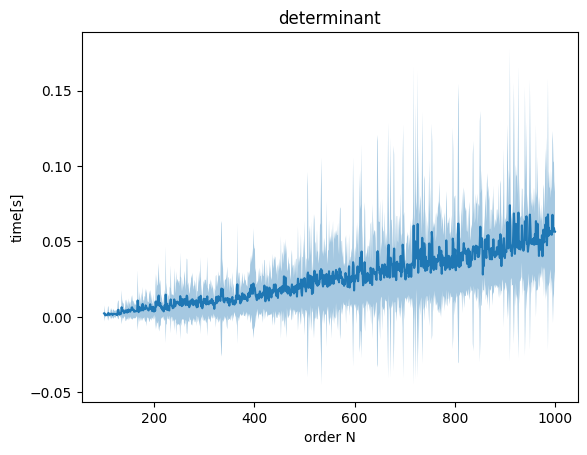

In [60]:
index = determinant_time_df.index.values
mean = determinant_time_df.mean(axis=1).values
std = determinant_time_df.std(axis=1).values
index = np.array(index, dtype=float)
mean = np.array(mean, dtype=float)
std = np.array(std, dtype=float)

#標準偏差込みの折れ線グラフ
ax = plt.subplot(111)
ax.set_title('determinant')
ax.set_ylabel("time[s]")
ax.set_xlabel("degree N")
ax.plot(index+100, mean)
ax.fill_between(index+100, mean + std, mean - std, alpha=0.4)



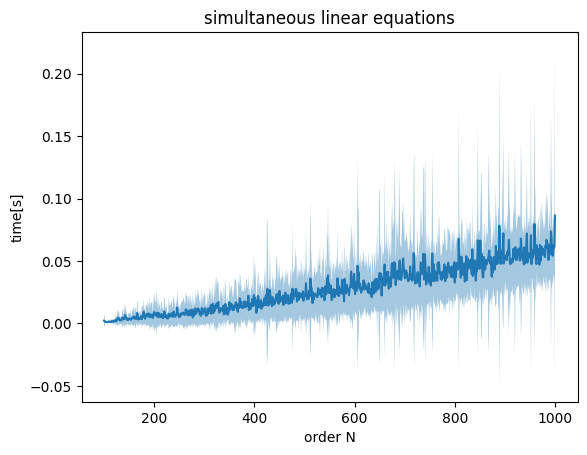

In [61]:
index = solver_time_df.index.values
mean = solver_time_df.mean(axis=1).values
std = solver_time_df.std(axis=1).values
index = np.array(index, dtype=float)
mean = np.array(mean, dtype=float)
std = np.array(std, dtype=float)

#標準偏差込みの折れ線グラフ
ax = plt.subplot(111)
ax.set_title('simultaneous linear equations')
ax.set_ylabel("time[s]")
ax.set_xlabel("degree N")
ax.plot(index+100, mean)
ax.fill_between(index+100, mean + std, mean - std, alpha=0.4)


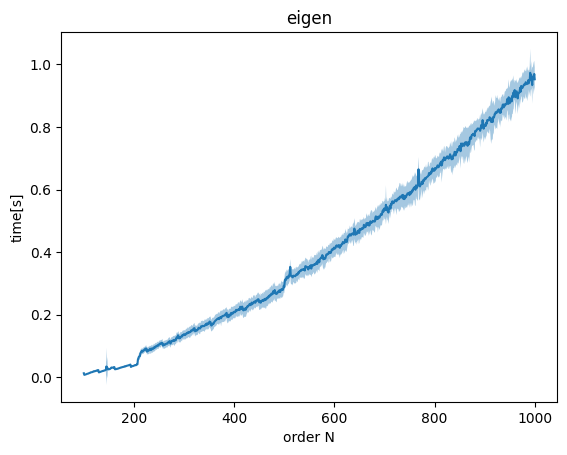

In [62]:
index = eig_time_df.index.values
mean = eig_time_df.mean(axis=1).values
std = eig_time_df.std(axis=1).values

index = np.array(index, dtype=float)
mean = np.array(mean, dtype=float)
std = np.array(std, dtype=float)
#標準偏差込みの折れ線グラフ
ax = plt.subplot(111)
ax.set_title('eigen')
ax.set_ylabel("time[s]")
ax.set_xlabel("degree N")
ax.plot(index+100, mean)
ax.fill_between(index+100, mean + std, mean - std, alpha=0.4)


In [79]:
import datetime
savetime = time.time()

t_delta = datetime.timedelta(hours=9)
JST = datetime.timezone(t_delta, 'JST')
now = datetime.datetime.now(JST)

d = now.date().strftime('%Y%m%d%H%S')

determinant_time_df.to_csv("data/det/" + d + "_det.csv")
solver_time_df.to_csv("data/sol/" + d + "_sol.csv")
eig_time_df.to_csv("data/eig/" + d + "_eig.csv")

## 計算精度の評価はどう行うべきか？